In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML



#Importing necessary libraries and modules required to build the classification model.

import numpy as np
import pickle
import cv2
import os
import matplotlib.pyplot as plt
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

2023-05-26 13:38:10.675350: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-26 13:38:17.189581: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
"""# Load Dataset
Initializing a few parameters required for the image dataset preprocessing.
"""

# Dimension of resized image
DEFAULT_IMAGE_SIZE = tuple((256, 256))

# Number of images used to train the model
N_IMAGES = 200

# Path to the dataset folder
root_dir = '/home/intern/Omprakash/PlantVillage'

train_dir = os.path.join(root_dir)
val_dir = os.path.join(root_dir)

"""We use the function `convert_image_to_array` to resize an image to the size `DEFAULT_IMAGE_SIZE` we defined above."""

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, DEFAULT_IMAGE_SIZE)   
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None


In [ ]:
print("Load images from all classes ...")
plant_disease_folder_list = listdir(train_dir)
print(len(plant_disease_folder_list))

Load images from all classes ...
15


##***Loading Training & Validation Data***##

In [ ]:
"""Here, we load the training data images by traversing through all the folders and converting all the images and labels into separate lists respectively.
*NOTE: We use a small portion of the entire dataset due to the computing limitations. Tweak `N_IMAGES` to include entire dataset.*
"""

image_list, label_list = [], []

try:
    print("[INFO] Loading images ...")
    plant_disease_folder_list = listdir(train_dir)

    for plant_disease_folder in plant_disease_folder_list:
        print(f"[INFO] Processing {plant_disease_folder} ...")
        plant_disease_image_list = listdir(f"{train_dir}/{plant_disease_folder}/")

        for image in plant_disease_image_list[:N_IMAGES]:
            image_directory = f"{train_dir}/{plant_disease_folder}/{image}"
            if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True:
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(plant_disease_folder)

    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Tomato_Early_blight ...
[INFO] Processing Pepper__bell___Bacterial_spot ...
[INFO] Processing Pepper__bell___healthy ...
[INFO] Processing Tomato_Leaf_Mold ...
[INFO] Processing Potato___Early_blight ...
[INFO] Processing Tomato_Spider_mites_Two_spotted_spider_mite ...
[INFO] Processing Tomato_healthy ...
[INFO] Processing Tomato__Tomato_YellowLeaf__Curl_Virus ...
[INFO] Processing Tomato_Bacterial_spot ...
[INFO] Processing Tomato_Septoria_leaf_spot ...
[INFO] Processing Tomato_Late_blight ...
[INFO] Processing Tomato__Target_Spot ...
[INFO] Processing Tomato__Tomato_mosaic_virus ...
[INFO] Processing Potato___healthy ...
[INFO] Processing Potato___Late_blight ...
[INFO] Image loading completed


In [ ]:
# Transform the loaded training image data into numpy array
np_image_list = np.array(image_list, dtype=np.float16) /255.0
print()

# Check the number of images loaded for training
image_len = len(image_list)
print(f"Total number of images: {image_len}")

"""Examine the labels/classes in the training dataset."""

label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)

pickle.dump(label_binarizer,open('plant_disease_label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

print("Total number of classes: ", n_classes)






Total number of images: 2951
Total number of classes:  15


In [ ]:
"""# Augment and Split Dataset
Using `ImageDataGenerator` to augment data by performing various operations on the training images.
"""

augment = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                             height_shift_range=0.1, shear_range=0.2, 
                             zoom_range=0.2, horizontal_flip=True, 
                             fill_mode="nearest")
print(augment)

In [ ]:
"""Splitting the data into training and test sets for validation purpose."""

print("[INFO] Splitting data to train and test...")
X_train, X_test, Y_train, Y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42)
print(X_train, X_test, Y_train, Y_test)

[INFO] Splitting data to train and test...
[[[[0.5176 0.506  0.569 ]
   [0.5806 0.569  0.6313]
   [0.5767 0.565  0.6274]
   ...
   [0.4941 0.4902 0.5527]
   [0.5527 0.549  0.612 ]
   [0.6235 0.6196 0.682 ]]

  [[0.5605 0.549  0.612 ]
   [0.5767 0.565  0.6274]
   [0.5605 0.549  0.612 ]
   ...
   [0.6235 0.6196 0.682 ]
   [0.6196 0.6157 0.678 ]
   [0.5527 0.549  0.612 ]]

  [[0.4941 0.4824 0.545 ]
   [0.5566 0.545  0.608 ]
   [0.5923 0.5806 0.643 ]
   ...
   [0.5806 0.5767 0.639 ]
   [0.569  0.565  0.6274]
   [0.5137 0.51   0.5728]]

  ...

  [[0.6274 0.612  0.6587]
   [0.6313 0.6157 0.6626]
   [0.6313 0.6157 0.6626]
   ...
   [0.647  0.639  0.686 ]
   [0.647  0.639  0.686 ]
   [0.6626 0.655  0.702 ]]

  [[0.6353 0.6196 0.6665]
   [0.6353 0.6196 0.6665]
   [0.639  0.6235 0.6704]
   ...
   [0.6704 0.6626 0.71  ]
   [0.6743 0.6665 0.714 ]
   [0.6904 0.682  0.7295]]

  [[0.655  0.639  0.686 ]
   [0.655  0.639  0.686 ]
   [0.6587 0.643  0.6904]
   ...
   [0.6743 0.6665 0.714 ]
   [0.6704 0.6

##***Classifcation CNN Model***##

In [ ]:
"""# Build Model
Defining the hyperparameters of the plant disease classification model.
"""

EPOCHS = 25
STEPS = 100
LR = 0.001
BATCH_SIZE = 32
WIDTH = 256
HEIGHT = 256
DEPTH = 3

In [ ]:
"""#Creating a sequential model and adding Convolutional, Normalization, Pooling, Dropout and Activation layers at the appropriate positions."""
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
inputShape = (HEIGHT, WIDTH, DEPTH)
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
#model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
#model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
#model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
#model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
#model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
#model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
#model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 activation_14 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 85, 85, 64)        18496     
                                                                 
 activation_15 (Activation)  (None, 85, 85, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 85, 85, 64)        36928     
                                                      

In [ ]:
"""# Train Model
We initialize Adam optimizer with learning rate and decay parameters. 
Also, we choose the type of loss and metrics for the model and compile it for training.
"""

# steps_per_epoch=len(x_train) // BATCH_SIZE,

# Initialize optimizer
opt = Adam(learning_rate=LR, decay=LR / EPOCHS)

# Compile model
#model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.save("my_model.h5")

# Train model
print("Training CNN...")
history = model.fit(augment.flow(X_train, Y_train, batch_size=BATCH_SIZE),
                              validation_data=(X_test, Y_test),
                              epochs=25, 
                              verbose=1)
        
scores = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {scores[1]*100}")

Training CNN...
Epoch 1/25


2023-05-25 19:49:44.932575: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


74/74 [==============================] - 106s 1s/step - loss: 0.2632 - accuracy: 0.0860 - val_loss: 0.2413 - val_accuracy: 0.1438
Epoch 2/25
74/74 [==============================] - 104s 1s/step - loss: 0.2137 - accuracy: 0.2695 - val_loss: 0.1896 - val_accuracy: 0.3503
Epoch 3/25
74/74 [==============================] - 103s 1s/step - loss: 0.1739 - accuracy: 0.4182 - val_loss: 0.2079 - val_accuracy: 0.3486
Epoch 4/25
74/74 [==============================] - 102s 1s/step - loss: 0.1524 - accuracy: 0.5042 - val_loss: 0.1541 - val_accuracy: 0.4958
Epoch 5/25
74/74 [==============================] - 103s 1s/step - loss: 0.1371 - accuracy: 0.5729 - val_loss: 0.1348 - val_accuracy: 0.5668
Epoch 6/25
74/74 [==============================] - 102s 1s/step - loss: 0.1271 - accuracy: 0.6114 - val_loss: 0.1654 - val_accuracy: 0.5228
Epoch 7/25
74/74 [==============================] - 102s 1s/step - loss: 0.1122 - accuracy: 0.6653 - val_loss: 0.1196 - val_accuracy: 0.6447
Epoch 8/25
74/74 [======

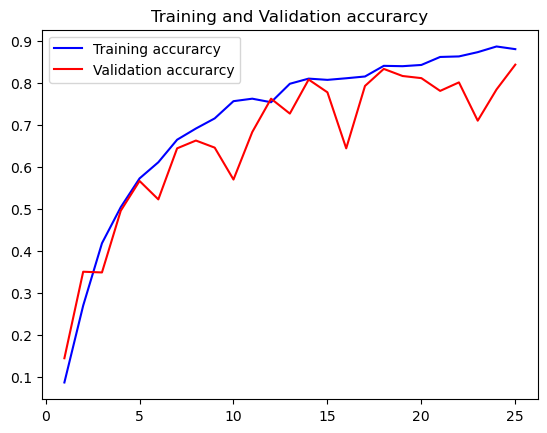

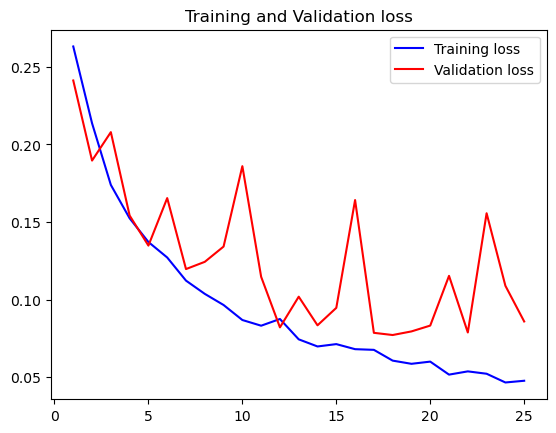

[INFO] Calculating model accuracy
19/19 [==============================] - 4s 211ms/step - loss: 0.0858 - accuracy: 0.8443
Test Accuracy: 84.43316221237183


In [ ]:
"""# Evaluate Model
Comparing the accuracy and loss by plotting the graph for training and validation.
"""

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

"""Evaluating model accuracy by using the `evaluate` method"""

print("[INFO] Calculating model accuracy")
scores = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {scores[1]*100}")

19/19 [==============================] - 4s 178ms/step


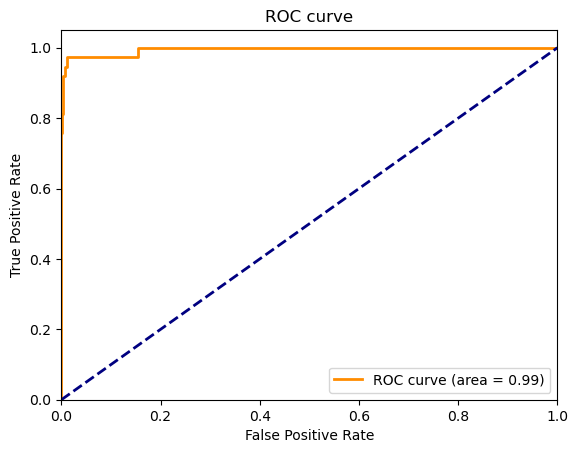

In [ ]:

from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 15 # number of class

# Make predictions using the multiclass classifier model
y_pred = model.predict(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_pred[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# The process of drawing a roc-auc curve belonging to a specific class

plt.figure()
lw = 2 # line_width
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2]) # Drawing Curve according to 15. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()



##***Predction Model***##

##***Federated CNN***##

In [ ]:
train_dataset=[]
for i in range(len(X_train)):
    train_dataset.append([X_train[i],Y_train[i]])

test_dataset=[]
for i in range(len(X_test)):
    test_dataset.append([X_test[i],Y_test[i]])

In [ ]:
import keras.backend as K

def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
def update_the_client(client_model, optimizer, train_loader, epoch):
        
    xx = []
    yy = []

    for i,j in train_loader:
      xx.append(i)
      yy.append(j)
    
    xx = np.array(xx)
    yy = np.array(yy)

    (X_train, X_test, y_train, y_test) = train_test_split(xx, yy,test_size=0.2, random_state=42) 
    
    print(1)
    history = client_model.fit(X_train,y_train, batch_size=32, epochs=epoch,validation_data=(X_test, y_test), verbose=1 ,callbacks=None)
  
    
    return history 

def central_model_aggregation(central_model, client_models):

    weights = []
    print("central_model_aggregation")
    for model in client_models:
      wt = model.get_weights()
      weights.append(wt)
    
    avg_wght = average(weights, axis = 0)
    
    central_model.set_weights(avg_wght)

    for model in client_models:
      model.set_weights(avg_wght)
    
def test(central_model, test_loader,epoch):
    
    xx = []
    yy = []

    for i,j in test_loader:
      xx.append(i)
      yy.append(j)
    
    xx = np.array(xx)
    yy = np.array(yy)

    (X_train, X_test, y_train, y_test) = train_test_split(xx, yy,test_size=0.1, random_state=1250) 
    
     # Evaluate the model on the test data
    results = central_model.evaluate(X_test, y_test, verbose=1)

    return results
    ''''
    history = central_model.fit(X_train,y_train, batch_size=32, epochs=epoch,validation_data=(X_test, y_test), verbose=1 ,callbacks=None)

    return history
    
    def test(central_model, X_test, y_test):
    loss, accuracy, fscore = central_model.evaluate(X_test, y_test, verbose=0)
    return loss, fscore
    '''

from tensorflow.keras import optimizers
opt = optimizers.Adam(learning_rate=0.001)



2023-05-26 13:40:21.427546: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [ ]:
total_clients=10
client_participate=5

In [ ]:
import cv2
import numpy as np
import glob
import pickle
# from sklearn.externals import joblib
from keras.applications.vgg16 import preprocess_input
from sklearn import preprocessing
# from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import glob
import keras
from keras.models       import Model
from keras.applications.densenet import DenseNet121
from keras.applications.vgg16 import VGG16
from keras.applications.densenet import DenseNet121
from keras.models import Model
import glob
from numpy import array, average,median
import matplotlib.pyplot as plt
import IPython.display as ipd 
#import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout
from tensorflow.keras.models import Sequential


def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))


train_size = 0.8
train_end = int(len(np_image_list)*train_size)

df_train = train_dataset
df_test = test_dataset


train_loader = split(df_train, total_clients)
train_loader = list(train_loader)
test_loader = list(df_test)
fscores = []

def fed_model(epoch,client_participate,total_clients):
    fscores = []
    train_loader = split(df_train, total_clients)
    train_loader = list(train_loader)
    test_loader = list(df_test)
    # Build Model
    #Defining the hyperparameters of the plant disease classification model.

    EPOCHS = 5
    STEPS = 50
    LR = 0.001
    BATCH_SIZE = 32
    WIDTH = 256
    HEIGHT = 256
    DEPTH = 3

    """#Creating a sequential model and adding Convolutional, Normalization, Pooling, Dropout and Activation layers at the appropriate positions."""
    
    model = Sequential()
    inputShape = (HEIGHT, WIDTH, DEPTH)

    model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
    model.add(Activation("relu"))
    #model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    #model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    #model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    #model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(Activation("relu"))
    #model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(Activation("relu"))
    #model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    #model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(n_classes))
    model.add(Activation("softmax"))

    model.summary()

    
   



    # Initialize optimizer
    opt = Adam(lr=LR, decay=LR / EPOCHS)

    # Compile model
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=[f1_metric])
    model.save("federated_cnn.h5")

    central_model = model

    
    client_models = [ model for _ in range(total_clients)]
    num_rounds=5
    for r in range(num_rounds):

        client_idx = np.random.permutation(total_clients)[:client_participate]
        for i in (range(client_participate)):
            
            ci = client_models[i]
            cix = client_idx[i]
            tli = train_loader[cix]
            print("\nRound : ", r , " Client : ", i, '\n')

            history = update_the_client(ci, opt, tli, epoch=EPOCHS)
        
        print("Central model training...........................\n")
        central_model_aggregation(central_model, client_models)
        
        fscore = test(central_model, test_loader,epoch=EPOCHS)
        #test_loss, fscore = ch.history['val_loss'][-1], ch.history['f1_metric'][-1]
        
        # Test the model
        #X_test, y_test = next(iter(test_loader))  # Assuming the test_loader yields a single batch
        #test_loss, fscore = test(central_model, X_test, y_test)
        #print("Test Loss:", test_loss)
        #print("F-Score:", fscore)
        fscores.append(fscore)
    return fscores

        

    

In [ ]:
fed_model(1,1,1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 85, 85, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        36928     
                                                        

/home/intern/anaconda3/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Round :  0  Client :  0 

1
Epoch 1/5
59/59 [==============================] - 85s 1s/step - loss: 0.2839 - f1_metric: 6.6467e-04 - val_loss: 0.2425 - val_f1_metric: 0.0000e+00
Epoch 2/5
59/59 [==============================] - 80s 1s/step - loss: 0.2242 - f1_metric: 0.0667 - val_loss: 0.1898 - val_f1_metric: 0.1145
Epoch 3/5
59/59 [==============================] - 80s 1s/step - loss: 0.1855 - f1_metric: 0.2736 - val_loss: 0.1744 - val_f1_metric: 0.3438
Epoch 4/5
59/59 [==============================] - 85s 1s/step - loss: 0.1605 - f1_metric: 0.4091 - val_loss: 0.1449 - val_f1_metric: 0.5029
Epoch 5/5
59/59 [==============================] - 80s 1s/step - loss: 0.1342 - f1_metric: 0.5564 - val_loss: 0.1378 - val_f1_metric: 0.5263
Central model training...........................

central_model_aggregation


/home/intern/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:509: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.asanyarray(a)


2/2 [==============================] - 0s 161ms/step - loss: 0.1640 - f1_metric: 0.5010

Round :  1  Client :  0 

1
Epoch 1/5
59/59 [==============================] - 103s 2s/step - loss: 0.1185 - f1_metric: 0.6384 - val_loss: 0.1397 - val_f1_metric: 0.5885
Epoch 2/5
59/59 [==============================] - 104s 2s/step - loss: 0.0949 - f1_metric: 0.7321 - val_loss: 0.1185 - val_f1_metric: 0.6570
Epoch 3/5
59/59 [==============================] - 104s 2s/step - loss: 0.0799 - f1_metric: 0.7914 - val_loss: 0.1250 - val_f1_metric: 0.6372
Epoch 4/5
59/59 [==============================] - 102s 2s/step - loss: 0.0627 - f1_metric: 0.8463 - val_loss: 0.1379 - val_f1_metric: 0.6426
Epoch 5/5
59/59 [==============================] - 104s 2s/step - loss: 0.0459 - f1_metric: 0.9021 - val_loss: 0.1358 - val_f1_metric: 0.6619
Central model training...........................

central_model_aggregation
2/2 [==============================] - 0s 209ms/step - loss: 0.1539 - f1_metric: 0.6298


[[0.16402778029441833, 0.5010350942611694],
 [0.15390437841415405, 0.6297556161880493]]

In [ ]:
fscores_1e1=fed_model(1,1,1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 85, 85, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        36928     
                                                        

/home/intern/anaconda3/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Round :  0  Client :  0 

1
Epoch 1/5
59/59 [==============================] - 91s 1s/step - loss: 0.2631 - f1_metric: 0.0040 - val_loss: 0.2189 - val_f1_metric: 0.0763
Epoch 2/5
59/59 [==============================] - 95s 2s/step - loss: 0.2057 - f1_metric: 0.1354 - val_loss: 0.1739 - val_f1_metric: 0.3184
Epoch 3/5
59/59 [==============================] - 85s 1s/step - loss: 0.1694 - f1_metric: 0.3678 - val_loss: 0.1547 - val_f1_metric: 0.4388
Epoch 4/5
59/59 [==============================] - 91s 2s/step - loss: 0.1439 - f1_metric: 0.5095 - val_loss: 0.1339 - val_f1_metric: 0.5514
Epoch 5/5
59/59 [==============================] - 98s 2s/step - loss: 0.1154 - f1_metric: 0.6593 - val_loss: 0.1199 - val_f1_metric: 0.6203
Central model training...........................

central_model_aggregation


/home/intern/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:509: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.asanyarray(a)


2/2 [==============================] - 0s 168ms/step - loss: 0.1254 - f1_metric: 0.6065

Round :  1  Client :  0 

1
Epoch 1/5
59/59 [==============================] - 107s 2s/step - loss: 0.0909 - f1_metric: 0.7435 - val_loss: 0.1178 - val_f1_metric: 0.6404
Epoch 2/5
59/59 [==============================] - 103s 2s/step - loss: 0.0713 - f1_metric: 0.8137 - val_loss: 0.1117 - val_f1_metric: 0.6825
Epoch 3/5
59/59 [==============================] - 102s 2s/step - loss: 0.0491 - f1_metric: 0.8984 - val_loss: 0.1220 - val_f1_metric: 0.6921
Epoch 4/5
59/59 [==============================] - 103s 2s/step - loss: 0.0368 - f1_metric: 0.9232 - val_loss: 0.1212 - val_f1_metric: 0.6934
Epoch 5/5
59/59 [==============================] - 104s 2s/step - loss: 0.0276 - f1_metric: 0.9586 - val_loss: 0.1230 - val_f1_metric: 0.7340
Central model training...........................

central_model_aggregation
2/2 [==============================] - 0s 151ms/step - loss: 0.1360 - f1_metric: 0.6842

Round :

In [ ]:
fscores_2e1=fed_model(1,8,10)
fscores_3e1=fed_model(1,5,10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 activation_7 (Activation)   (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 activation_8 (Activation)   (None, 85, 85, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 85, 85, 64)        36928     
                                                      


Round :  0  Client :  7 

1
Epoch 1/5
6/6 [==============================] - 8s 1s/step - loss: 0.1972 - f1_metric: 0.4667 - val_loss: 0.1419 - val_f1_metric: 0.5882
Epoch 2/5
6/6 [==============================] - 8s 1s/step - loss: 0.1612 - f1_metric: 0.4540 - val_loss: 0.1587 - val_f1_metric: 0.4914
Epoch 3/5
6/6 [==============================] - 8s 1s/step - loss: 0.1432 - f1_metric: 0.5260 - val_loss: 0.1168 - val_f1_metric: 0.5842
Epoch 4/5
6/6 [==============================] - 8s 1s/step - loss: 0.1144 - f1_metric: 0.6585 - val_loss: 0.1247 - val_f1_metric: 0.6154
Epoch 5/5
6/6 [==============================] - 8s 1s/step - loss: 0.0813 - f1_metric: 0.7965 - val_loss: 0.1296 - val_f1_metric: 0.6667
Central model training...........................

central_model_aggregation
2/2 [==============================] - 0s 155ms/step - loss: 0.1623 - f1_metric: 0.6233

Round :  1  Client :  0 

1
Epoch 1/5
6/6 [==============================] - 9s 1s/step - loss: 0.1122 - f1_metric:


Round :  2  Client :  2 

1
Epoch 1/5
6/6 [==============================] - 9s 1s/step - loss: 0.1543 - f1_metric: 0.6828 - val_loss: 0.1547 - val_f1_metric: 0.6177
Epoch 2/5
6/6 [==============================] - 8s 1s/step - loss: 0.0785 - f1_metric: 0.8186 - val_loss: 0.1459 - val_f1_metric: 0.4986
Epoch 3/5
6/6 [==============================] - 8s 1s/step - loss: 0.0664 - f1_metric: 0.8511 - val_loss: 0.1425 - val_f1_metric: 0.6160
Epoch 4/5
6/6 [==============================] - 8s 1s/step - loss: 0.0449 - f1_metric: 0.8999 - val_loss: 0.1785 - val_f1_metric: 0.6335
Epoch 5/5
6/6 [==============================] - 9s 1s/step - loss: 0.0304 - f1_metric: 0.9481 - val_loss: 0.1511 - val_f1_metric: 0.6240

Round :  2  Client :  3 

1
Epoch 1/5
6/6 [==============================] - 8s 1s/step - loss: 0.0570 - f1_metric: 0.8814 - val_loss: 0.1736 - val_f1_metric: 0.5443
Epoch 2/5
6/6 [==============================] - 9s 1s/step - loss: 0.0341 - f1_metric: 0.9268 - val_loss: 0.2171 

6/6 [==============================] - 8s 1s/step - loss: 0.0218 - f1_metric: 0.9739 - val_loss: 0.1830 - val_f1_metric: 0.6463
Epoch 2/5
6/6 [==============================] - 8s 1s/step - loss: 0.0159 - f1_metric: 0.9844 - val_loss: 0.1894 - val_f1_metric: 0.7088
Epoch 3/5
6/6 [==============================] - 8s 1s/step - loss: 0.0090 - f1_metric: 0.9948 - val_loss: 0.1911 - val_f1_metric: 0.6497
Epoch 4/5
6/6 [==============================] - 8s 1s/step - loss: 0.0062 - f1_metric: 1.0000 - val_loss: 0.2007 - val_f1_metric: 0.6094
Epoch 5/5
6/6 [==============================] - 8s 1s/step - loss: 0.0035 - f1_metric: 0.9948 - val_loss: 0.2032 - val_f1_metric: 0.6406

Round :  3  Client :  6 

1
Epoch 1/5
6/6 [==============================] - 9s 1s/step - loss: 0.0234 - f1_metric: 0.9649 - val_loss: 0.1776 - val_f1_metric: 0.6841
Epoch 2/5
6/6 [==============================] - 8s 1s/step - loss: 0.0183 - f1_metric: 0.9844 - val_loss: 0.1865 - val_f1_metric: 0.6667
Epoch 3/5
6/6 [

2/2 [==============================] - 0s 149ms/step - loss: 0.1879 - f1_metric: 0.7381
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 activation_14 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 85, 85, 64)        18496     
                                                                 
 activation_15 (Activation)  (None, 85, 85, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (No

Epoch 4/5
6/6 [==============================] - 10s 2s/step - loss: 0.1116 - f1_metric: 0.6564 - val_loss: 0.1939 - val_f1_metric: 0.4465
Epoch 5/5
6/6 [==============================] - 10s 2s/step - loss: 0.0894 - f1_metric: 0.7698 - val_loss: 0.1879 - val_f1_metric: 0.4433

Round :  1  Client :  2 

1
Epoch 1/5
6/6 [==============================] - 10s 2s/step - loss: 0.1764 - f1_metric: 0.4484 - val_loss: 0.1308 - val_f1_metric: 0.6193
Epoch 2/5
6/6 [==============================] - 10s 2s/step - loss: 0.1408 - f1_metric: 0.5537 - val_loss: 0.1383 - val_f1_metric: 0.5138
Epoch 3/5
6/6 [==============================] - 10s 2s/step - loss: 0.1074 - f1_metric: 0.6811 - val_loss: 0.1433 - val_f1_metric: 0.6071
Epoch 4/5
6/6 [==============================] - 10s 2s/step - loss: 0.0925 - f1_metric: 0.7229 - val_loss: 0.1565 - val_f1_metric: 0.5551
Epoch 5/5
6/6 [==============================] - 10s 2s/step - loss: 0.0640 - f1_metric: 0.8378 - val_loss: 0.1851 - val_f1_metric: 0.500

6/6 [==============================] - 10s 2s/step - loss: 0.0238 - f1_metric: 0.9532 - val_loss: 0.1469 - val_f1_metric: 0.6129
Epoch 4/5
6/6 [==============================] - 10s 2s/step - loss: 0.0104 - f1_metric: 0.9974 - val_loss: 0.1472 - val_f1_metric: 0.6882
Epoch 5/5
6/6 [==============================] - 10s 2s/step - loss: 0.0054 - f1_metric: 1.0000 - val_loss: 0.1700 - val_f1_metric: 0.7193

Round :  3  Client :  3 

1
Epoch 1/5
6/6 [==============================] - 10s 2s/step - loss: 0.0426 - f1_metric: 0.9209 - val_loss: 0.1650 - val_f1_metric: 0.6341
Epoch 2/5
6/6 [==============================] - 11s 2s/step - loss: 0.0265 - f1_metric: 0.9592 - val_loss: 0.1667 - val_f1_metric: 0.6458
Epoch 3/5
6/6 [==============================] - 10s 2s/step - loss: 0.0156 - f1_metric: 0.9792 - val_loss: 0.1680 - val_f1_metric: 0.6882
Epoch 4/5
6/6 [==============================] - 10s 2s/step - loss: 0.0122 - f1_metric: 0.9750 - val_loss: 0.1587 - val_f1_metric: 0.5828
Epoch 5/

In [ ]:
fscores_1e5=fed_model(5,1,1)
fscores_2e5=fed_model(5,8,10)
fscores_3e5=fed_model(5,5,10)

In [ ]:
fscores_1e3=fed_model(3,1,1)
fscores_2e3=fed_model(3,8,10)
fscores_3e3=fed_model(3,5,10)

In [ ]:
data=[fscores_1e1,fscores_2e1,fscores_3e1]

f = open(" om_e1.txt", "w")
for t in data:
    for d in t:
        f.write(f"{d},")
    f.write(f"\n")

f.close()


data=[fscores_1e3,fscores_2e3,fscores_3e3]

f = open("om_e3.txt", "w")
for t in data:
    for d in t:
        f.write(f"{d},")
    f.write(f"\n")

f.close()


data=[fscores_1e5,fscores_2e5,fscores_3e5]

f = open("om_e5.txt", "w")
for t in data:
    for d in t:
        f.write(f"{d},")
    f.write(f"\n")

f.close()

